# Electron hybrid code for R/L-waves with stationary ions

## 1. The model
The electron hybrid model for cold fluid electrons and hot kinetic electrons reads

\begin{align}
\frac{\partial \textbf{j}_\text{c}}{\partial t} = \epsilon_0\Omega_{\text{pe}}^2\textbf{E} + \Omega_\text{ce}\textbf{j}_\text{c}\times\textbf{e}_z,  \\
\frac{1}{c^2}\frac{\partial \textbf{E}}{\partial t} = \nabla\times\textbf{B} - \mu_0(\textbf{j}_\text{c} + \textbf{j}_\text{h}), \\
\frac{\partial \textbf{B}}{\partial t}=-\nabla\times\textbf{E}, \\
\frac{\partial f_\text{h}}{\partial t} + \textbf{v}\cdot\nabla f_\text{h} + \frac{q}{m}(\textbf{E}+\textbf{v}\times\textbf{B})\cdot\nabla_v f_\text{h}=0, \\
\textbf{j}_\text{h} = q\int\text{d}^3\textbf{v}\,\textbf{v}f_\text{h}.
\end{align}

where $\Omega_\text{ce}=\frac{q B_0}{m}$ is the signed cyclotron frequency and $\Omega_{\text{pe}}^2=\frac{n_\text{c}e^2}{\epsilon_0 m}$ the plasma frequency of the cold electrons. Here, only wave propagation parallel to the background magnetic field $\textbf{B}_0=B_0\textbf{e}_z$ is considered, i.e. $\textbf{k}=k\textbf{e}_z$. Therefore the nabla operator is simply $\nabla=\textbf{e}_z\partial_z$.

The first three equations are written in the compact form 

\begin{align}
\partial_t \textbf{U}+A_1\partial_z \textbf{U}+A_2\textbf{U}=\textbf{F},
\end{align}

for the electromagnetic fields $\textbf{E},\textbf{B}$ and the cold current density $\textbf{j}_\text{c}$, i.e. $\textbf{U}=(E_x,E_y,B_x,B_y,j_{\text{c}x},j_{\text{c}y})$. The z-components do not appear because they correspond to electrostatic waves which are not considered in this work. The matrices are

\begin{align}
A_1=
\begin{pmatrix}
0 &0  &0 &c^2  &0 &0 \\
0 &0  &-c^2 &0 &0 &0 \\
0 &-1  &0 &0 &0 &0  \\
1 &0  &0 &0 &0 &0  \\
0 &0  &0 &0 &0 &0   \\
0 &0  &0 &0 &0 &0 
\end{pmatrix}
\end{align}

and 

\begin{align}
A_2=
\begin{pmatrix}
0 &0 &0 &0 &\mu_0c^2 &0 \\
0 &0 &0 &0 &0 &\mu_0c^2 \\
0 &0 &0 &0 &0 &0 \\
0 &0 &0 &0 &0 &0 \\
-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &0 &0 &-\Omega_{\text{ce}} \\
0 &-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &\Omega_{\text{ce}} &0 \\
\end{pmatrix}
\end{align}

with $\Omega_{\text{ce}}=-\frac{eB_0}{m}<0$ for electrons. The inhomogeneity is 

\begin{align}
\textbf{F}=
\begin{pmatrix}
-\mu_0c^2 j_{\text{h}x} \\
-\mu_0c^2 j_{\text{h}y} \\
0 \\
0 \\
0 \\
0
\end{pmatrix}.
\end{align}


## 2. Dispersion relation
Linear theory of the above model leads to the following general dispersion relation for an arbitrary equilibrium distribution function $f^0=f^0(v_\parallel,v_\bot)$:


\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega}\int\text{d}^3\textbf{v}\frac{v_\bot}{2}\frac{\hat{G}f_\text{h}^0}{\omega\pm\Omega_{\text{ce}}-kv_\parallel}=0.
\end{align}

Here $\nu_\text{h}=n_\text{h}/n_\text{c}\ll1$ is the ratio between the hot and cold electron number densities, respectively, $\text{d}^3\textbf{v}=\text{d}v_\parallel\text{d}v_\bot v_\bot 2\pi$ and the differential operator

\begin{align}
\hat{G}=\frac{\partial}{\partial v_\bot}+\frac{k}{\omega}\left(v_\bot\frac{\partial}{\partial v_\parallel}-v_\parallel\frac{\partial}{\partial v_\bot}\right).
\end{align}

For an anisotropic Maxwellian 

\begin{align}
f^0(v_\parallel,v_\bot) = \frac{1}{(2\pi)^{3/2}w_\parallel w_\bot^2}\exp\left(-\frac{v_\parallel^2}{2w_\parallel^2}-\frac{v_\bot^2}{2w_\bot^2}\right)
\end{align}

the dispersion relation is given by

\begin{align}
D_{\text{R/L}}(k,\omega)=D_{\text{cold,R/L}}(k,\omega)+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega^2}\left[\frac{\omega}{k\sqrt{2}w_\parallel}Z(\xi^{\pm})-\left(1-\frac{w_\bot^2}{w_\parallel^2}\right)(1+\xi^{\pm} Z(\xi^{\pm}))\right]=0, 
\end{align}

where $Z$ is the plasma dispersion function and 

\begin{align}
\xi^{\pm} = \frac{\omega\pm\Omega_\text{ce}}{k\sqrt{2}w_\parallel}.
\end{align}

## 3. Discretization
For the fields, B-spline Finite Elements are used together with a Crank-Nicolson time discretization which leads to the following matrix formulation:

\begin{align}
\left[M+\frac{1}{2}\Delta tCA_1+\frac{1}{2}\Delta tMA_2\right]\textbf{U}^{n+1}=\left[M-\frac{1}{2}\Delta tCA_1-\frac{1}{2}\Delta tMA_2\right]\textbf{U}^{n} + \Delta t \tilde{\textbf{F}}^{n+1/2},
\end{align}

with the mass and convection matrices

\begin{align}
M_{ij}=\int\varphi_i\varphi_j\,\text{d}z, \\
C_{ij}=\int\varphi_i\varphi_j^\prime\,\text{d}z
\end{align}

The hot current density is obtained using PIC techniques, i.e. the distribution function reads

\begin{align}
f_\text{h}(z,\textbf{v},t) \approx \frac{1}{N_k}\sum_k w_k\delta(z-z_k(t))\delta(\textbf{v}-\textbf{v}_k(t))
\end{align},

with the orbit equations

\begin{align}
\frac{\text{d}z_k}{dt}=v_{kz}, \\
\frac{\text{d}\textbf{v}_k}{dt}=\frac{q}{m}(\textbf{E}_k+\textbf{v}_k\times\textbf{B}_k).
\end{align}
With the definition of $f_\text{h}$ the inhomogeneity $\tilde{\textbf{F}}^{n+1/2}$ is

\begin{align}
\tilde{F}^{n+1/2}_i = -c^2\mu_0q\frac{1}{N_k}\sum_k w_k\textbf{v}_k^{n+1/2}\varphi_i(z_k^{n+1/2}).
\end{align}

In [54]:
import numpy as np
import time
from copy import deepcopy
from scipy.linalg import block_diag
import Utilitis_HybridCode as utils



# ... start the simulation from the beginning (0) or continue (1)
restart = 0 

# ... directory for saving data
title = 'Results/01_NoDipoleField/simulation_data_T=200_L=2pi_2_test.txt' 

# ... save only every saving_step-th time step
saving_step = 5


# ... physical parameters
eps0 = 1.0                         # ... vacuum permittivity
mu0 = 1.0                          # ... vacuum permeability
c = 1.0                            # ... speed of light
qe = -1.0                          # ... electron charge
me = 1.0                           # ... electron mass
B0z = 1.0                          # ... background magnetic field in z-direction
wce = qe*B0z/me                    # ... electron cyclotron frequency
wpe = 2*np.abs(wce)                # ... cold electron plasma frequency
nuh = 6e-2                         # ... ratio of cold/hot electron densities (nh/nc)
nh = nuh*wpe**2                    # ... hot electron density
wpar = 0.2*c                       # ... parallel thermal velocity of energetic particles
wperp = 0.53*c                     # ... perpendicular thermal velocity of energetic particles
# ...



# ... parameters for initial conditions
k = 2                              # ... wavenumber of initial wave fields
ini = 3                            # ... initial conditions for wave fields
amp = 1e-4                         # ... amplitude of initial wave fields
eps = 0.0                          # ... amplitude of spatial pertubation of distribution function 
# ...



# ... numerical parameters
Lz = 2*np.pi/k                     # ... length of z-domain
Nz = 64                           # ... number of elements z-direction
T = 200.0                          # ... simulation time
dt = 0.05                          # ... time step
p = 3                              # ... degree of B-spline basis
Lv = 8                             # ... length of v-domain in each direction (vx,vy,vz)
Nv = 76                            # ... number of cells in each v-direction (vx,vy,vz)
Np = np.int(1e5)                   # ... number of energetic simulation particles 
# ...



# ... create parameter list
pa = np.zeros(8*Nz + 5)

pa[0]  = eps0
pa[1]  = mu0
pa[2]  = c
pa[3]  = qe 
pa[4]  = me 
pa[5]  = B0z 
pa[6]  = wce 
pa[7]  = wpe 
pa[8]  = nuh 
pa[9]  = nh 
pa[10] = wpar 
pa[11] = wperp 
pa[12] = k 
pa[13] = ini 
pa[14] = amp 
pa[15] = eps 
pa[16] = Lz 
pa[17] = Nz 
pa[18] = T 
pa[19] = dt 
pa[20] = p 
pa[21] = Lv 
pa[22] = Nv 
pa[23] = Np 

pa[27] = 1
pa[30] = saving_step
# ...



# ... discretization parameters
dz = Lz/Nz
zj = np.linspace(0, Lz, Nz + 1)

dv = Lv/Nv
vj = np.linspace(-Lv/2, Lv/2, Nv+1)
# ...


# ... energies
en_B  = np.array([])
en_E  = np.array([])
en_jc = np.array([])
en_jh = np.array([])
# ...


# ... system matrices for fluid electrons and electromagnetic fields
A10 = np.array([0, 0, 0, +c**2, 0, 0])
A11 = np.array([0, 0, -c**2, 0, 0, 0])
A12 = np.array([0, -1, 0, 0, 0, 0])
A13 = np.array([+1, 0, 0, 0, 0, 0])
A14 = np.array([0, 0, 0, 0, 0, 0])
A15 = np.array([0, 0, 0, 0, 0, 0])
A1 = np.array([A10, A11, A12, A13, A14, A15])

A20 = np.array([0, 0, 0, 0, mu0*c**2, 0])
A21 = np.array([0, 0, 0, 0, 0, mu0*c**2])
A22 = np.array([0, 0, 0, 0, 0, 0])
A23 = np.array([0, 0, 0, 0, 0, 0])
A24 = np.array([-eps0*wpe**2, 0, 0, 0, 0, -wce])
A25 = np.array([0, -eps0*wpe**2, 0, 0, +wce, 0])
A2 = np.array([A20, A21, A22, A23, A24, A25])

s = int(np.sqrt(A1.size))

def B_background_z(z):
    return B0z*(1 + 0*(z - Lz/2)**2)
# ...




# ... time integration 
def update(uj, particles, Ep, Bp ,dt):
    
    
    # ... save old positions
    zold = deepcopy(particles[:, 0])
    # ...
    
    
    # ... update particle velocities from n-1/2 to n+1/2 with fields at time n and positions from n to n+1 with velocities at n+1/2
    znew, vnew = utils.borisPush(particles, dt, Bp, Ep, qe, me, Lz)
    # ...
    
    
    # ... update weights with control variate
    wnew = w0 - Maxwell(vnew[:, 0], vnew[:, 1], vnew[:, 2])/g0
    # ...
    
    
    # ... compute hot electron current densities
    jhnew = utils.hotCurrent(vnew[:, 0:2], 1/2*(znew + zold), wnew, zj, bsp, qe, c)
    # ...
     
    
    # ... assemble right-hand side of weak formulation
    Fh[0::s] = -c**2*mu0*jhnew[0::2]
    Fh[1::s] = -c**2*mu0*jhnew[1::2]
    # ...
    
    
    # ... time integration of E,B,jc from n to n+1 with Crank-Nicolson method (use hot current density at n+1/2) 
    ujnew = np.dot(LHSinv,np.dot(RHS, uj) + dt*Fh)
    # ...
    
    
    # ... compute fields at particle positions with new fields 
    Epnew, Bpnew = utils.fieldInterpolation(znew, zj, bsp, ujnew)
    # ...
    
    return znew, vnew, wnew, jhnew, ujnew, Epnew, Bpnew
# ...






if restart == 0:


    # ... initial energetic particle distribution function (perturbed anisotropic Maxwellian)
    def fh0(z, vx, vy, vz, eps):
        return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
    # ...


    # ... Maxwellian for control variate
    def Maxwell(vx, vy, vz):
        return nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
    # ...


    # ... sampling distribution for initial markers
    def g_sampling(vx, vy, vz):
        return 1/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))*1/Lz
    # ...



    # ... create periodic B-spline basis and quadrature grid
    bsp, N, quad_points, weights = utils.createBasis(Lz, Nz, p)
    # ...



    # ... matrices for linear system
    Nb = N - p                        # ... number of unique B-splines for periodic boundary conditions

    uj = np.zeros(s*Nb)               # ... coefficients for Galerkin approximation
    Fh = np.zeros(s*Nb)               # ... RHS of matrix system

    Mblock = np.zeros((s*Nb, s*Nb))   # ... block mass matrix    
    Cblock = np.zeros((s*Nb, s*Nb))   # ... block convection matrix

    u0 = np.zeros((Nb, s))            # ... L2-projection of initial conditions

    A1block = block_diag(*([A1]*Nb))  # ... block system matrix A1
    A2block = block_diag(*([A2]*Nb))  # ... block system matrix A2
    # ...





    # ... assemble mass and convection matrices
    timea = time.time()

    M,C = utils.matrixAssembly(bsp, weights, quad_points, B_background_z, 1)[0:2]

    timeb = time.time()
    print('time for matrix assembly: ' + str(timeb - timea))
    # ...





    # ... assemble u0
    timea = time.time()

    for qu in range (0, s):
        
        def initial(z):
            return utils.IC(z, ini, amp, k, omega = 0)[qu]

        u0[:,qu] = utils.L2proj(bsp, Lz, quad_points, weights, M, initial)

    uj = np.reshape(u0, s*Nb)

    timeb = time.time()
    print('time for initial vector assembly: ' + str(timeb - timea))
    # ...



    # ... construct block mass and convection matrices
    for i in range(0, s):
        Mblock[i::s, i::s] = M
        Cblock[i::s, i::s] = C
    # ...



    # ... create particles (z,vx,vy,vz,wk) and sample positions and velocities according to sampling distribution
    particles = np.zeros((Np ,5))
    particles[:, 0] = np.random.rand(Np)*Lz
    particles[:, 1] = np.random.randn(Np)*wperp
    particles[:, 2] = np.random.randn(Np)*wperp
    particles[:, 3] = np.random.randn(Np)*wpar
    # ...




    # ... parameters for control variate
    g0 = g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
    w0 = fh0(particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], eps)/g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
    # ...



    # ... initial fields at particle positions
    Ep = np.zeros((Np, 3))
    Bp = np.zeros((Np, 3))
    Bp[:, 2] = B0z

    timea = time.time()

    Ep[:, 0:2], Bp[:, 0:2] = utils.fieldInterpolation(particles[:, 0], zj, bsp, uj)

    timeb = time.time()
    print('time for intial field interpolation: ' + str(timeb - timea))
    # ...





    # ... initialize velocities by pushing back by -dt/2, compute weights and energy of hot particles
    timea = time.time()
    
    en_jh = np.append(en_jh, me/(2*Np)*np.dot(particles[:, 4], particles[:, 1]**2 + particles[:, 2]**2 + particles[:, 3]**2))

    particles[:, 1:4] = utils.borisPush(particles, -dt/2, Bp, Ep, qe, me, Lz)[1]
    particles[:, 4] = w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0

    timeb = time.time()
    print('time for intial particle push: ' + str(timeb - timea))
    #





    # ... compute matrices for field update
    timea = time.time()

    LHS = Mblock + 1/2*dt*np.dot(Cblock, A1block) + 1/2*dt*np.dot(Mblock, A2block)
    RHS = Mblock - 1/2*dt*np.dot(Cblock, A1block) - 1/2*dt*np.dot(Mblock, A2block)
    LHSinv = np.linalg.inv(LHS)

    timeb = time.time()
    print('time for update matrix computation: ' + str(timeb - timea))
    # ...





    # ... create data file and save parameters (first row), initial fields and energies (second row)
    #file = open(title, 'ab')

    #np.savetxt(file, np.reshape(pa, (1, 8*Nb + 5)), fmt = '%1.5e')

    data = np.append(uj, np.zeros(2*Nb))
    
    en_E  = np.append(en_E, eps0/2*(np.dot(uj[0::s], np.dot(M, uj[0::s])) + np.dot(uj[1::s], np.dot(M, uj[1::s]))))
    en_B  = np.append(en_B, eps0/(2*mu0)*(np.dot(uj[2::s], np.dot(M, uj[2::s])) + np.dot(uj[3::s], np.dot(M, uj[3::s]))))
    en_jc = np.append(en_jc, 1/(2*eps0*wpe**2)*(np.dot(uj[4::s], np.dot(M, uj[4::s])) + np.dot(uj[5::s], np.dot(M, uj[5::s]))))
    
    data = np.append(data, np.array([en_E[-1], en_B[-1], en_jc[-1], en_jh[-1]]))
    
    data = np.append(data, 0.)
    #np.savetxt(file, np.reshape(data, (1,8*Nb + 5)), fmt = '%1.5e')
    # ...



    # ... time loop
    print('start time integration!')
    time_step = 0

    while True:

        try:
            if time_step%50 == 0:
                print('time steps finished: ' + str(time_step))

            particles[:, 0], particles[:, 1:4], particles[:, 4], jh, uj, Ep[:, 0:2], Bp[:, 0:2] = update(uj, particles, Ep, Bp, dt)

            if time_step%saving_step == 0:
                
                # ... add data to file
                data = np.append(uj, jh)
                
                en_E  = np.append(en_E, eps0/2*(np.dot(uj[0::s], np.dot(M, uj[0::s])) + np.dot(uj[1::s], np.dot(M, uj[1::s]))))
                en_B  = np.append(en_B, eps0/(2*mu0)*(np.dot(uj[2::s], np.dot(M, uj[2::s])) + np.dot(uj[3::s], np.dot(M, uj[3::s]))))
                en_jc = np.append(en_jc, 1/(2*eps0*wpe**2)*(np.dot(uj[4::s], np.dot(M, uj[4::s])) + np.dot(uj[5::s], np.dot(M, uj[5::s]))))
                en_jh = np.append(en_jh, me/(2*Np)*np.dot(particles[:, 4], particles[:, 1]**2 + particles[:, 2]**2 + particles[:, 3]**2))
                  
                data = np.append(data, np.array([en_E[-1], en_B[-1], en_jc[-1], en_jh[-1]]))
                
                data = np.append(data, (time_step + 1)*dt)
                #np.savetxt(file, np.reshape(data, (1, 8*Nb + 5)), fmt = '%1.5e')
                # ...
                
            time_step += 1
        except KeyboardInterrupt:
            print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
            try:
                response = input()
                if response == 'quit':
                    break
                print('Resuming...')
            except KeyboardInterrupt:
                print('Resuming...')
                continue
    # ...


    #file.close()
    

    
    
    
    
if restart == 1:
    
    # ... open data file that hasn't been finished yet
    file = open(title, 'ab')
    # ...


    # ... time loop
    print('total number of time steps: ' + str(Nt))

    for i in range(n, Nt):

        if i%50 == 0:
            print('time steps finished: ' + str(i))

        particles[:, 0], particles[:, 1:4], particles[:, 4], jh, uj, Ep[:, 0:2], Bp[:, 0:2] = update(uj, particles, Ep, Bp, dt)

        if i%10 == 0:
            # ... add data to file
            data = np.append(uj, jh)
            data = np.append(data, tn[i + 1])
            np.savetxt(file, np.reshape(data, (1, 8*Nb + 1)), fmt = '%1.5e')
            # ...
    # ...


    file.close()

time for matrix assembly: 0.6634337902069092
time for initial vector assembly: 0.3757047653198242
time for intial field interpolation: 0.10210514068603516
time for intial particle push: 0.02814483642578125
time for update matrix computation: 0.038889169692993164
start time integration!
time steps finished: 0
time steps finished: 50
time steps finished: 100
time steps finished: 150
time steps finished: 200
time steps finished: 250
time steps finished: 300
time steps finished: 350
time steps finished: 400
time steps finished: 450
time steps finished: 500
time steps finished: 550
time steps finished: 600
time steps finished: 650
time steps finished: 700
time steps finished: 750
time steps finished: 800
time steps finished: 850
time steps finished: 900
time steps finished: 950
time steps finished: 1000
time steps finished: 1050
time steps finished: 1100
time steps finished: 1150
time steps finished: 1200
time steps finished: 1250
time steps finished: 1300
time steps finished: 1350
time ste

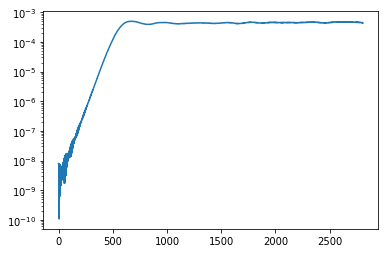

In [55]:
import matplotlib.pyplot as plt
plt.semilogy(en_B)
#plt.plot(en_jh)

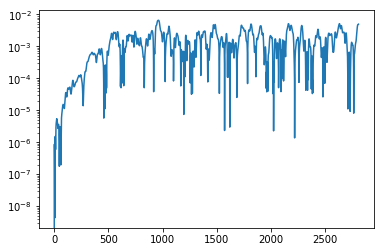

In [56]:
Eh_eq = Lz*nh*me/2*(wpar**2 + wperp**2)
en_tot = en_B + en_E + en_jc + en_jh + Eh_eq
en_ini = en_B[0] + en_E[0] + en_jc[0] + en_jh[0] + Eh_eq
plt.semilogy(np.abs(en_tot - en_ini)/en_ini)

In [32]:
Eh_eq

0.12097644990443578

In [63]:
# plot distribution function
Nbin = 256
fdens = np.zeros((Nbin, Nbin))
fdensv = np.zeros((Nbin, Nbin))

dz_bin = Lz/Nbin
dv_bin = Lv/Nbin
z_bin = np.linspace(0, Lz, Nbin + 1)
z_bin = np.delete(z_bin, -1) + dz_bin/2
v_bin = np.linspace(-Lv/2, Lv/2, Nbin + 1)
v_bin = np.delete(v_bin, -1) + dv_bin/2

Zedges = np.linspace(0, Lz, Nbin + 1)
Vedges = np.linspace(-Lv/2, Lv/2, Nbin + 1)
ZZ, VV = np.meshgrid(z_bin, v_bin)
binVol = dz_bin*dv_bin

Vedges_perp = np.linspace(0, Lv/2, Nbin + 1)
dv_bin_perp = Lv/2/Nbin
v_bin_perp = np.delete(Vedges_perp, -1) + dv_bin_perp/2
VVpar, VVperp = np.meshgrid(v_bin, v_bin_perp)

# ... update distribution function
Zbin = np.digitize(particles[:, 0], Zedges) - 1
Vbin = np.digitize(particles[:, 3], Vedges) - 1

for i in range(0, Nbin):
    fdens[:, i] = np.bincount(Vbin[np.where(Zbin == i)[0]], particles[np.where(Zbin == i)[0], 4], Nbin)

fdens = fdens/(Np*binVol)
# ...


vperp = np.sqrt(particles[:, 1]**2 + particles[:, 2]**2)

# ... update distribution function
Vbin_perp = np.digitize(vperp, Vedges_perp) - 1
Vbin_z = np.digitize(particles[:, 3], Vedges) - 1

for i in range(0, Nbin):
    fdensv[:, i] = np.bincount(Vbin_perp[np.where(Vbin_z == i)[0]], particles[np.where(Vbin_z == i)[0], 4], Nbin)

fdensv = fdensv/(Np*dv_bin*dv_bin_perp) + 0*fh0(0, VVperp/np.sqrt(2), VVperp/np.sqrt(2), VVpar, 0)
# ...

Text(0,0.5,'$v_\\parallel$')

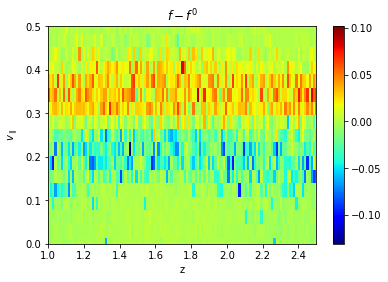

In [66]:
plt.pcolor(ZZ, VV, fdens, cmap = 'jet')
plt.ylim((0.0,0.5))
plt.xlim((1.0,2.5))
plt.colorbar()
plt.title('$f-f^0$')
plt.xlabel('z')
plt.ylabel('$v_\parallel$')

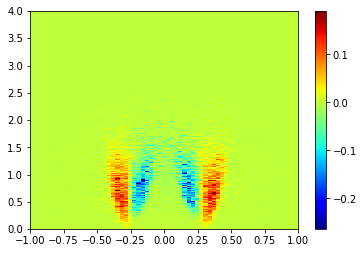

In [111]:
plt.pcolor(VVpar, VVperp, fdensv, cmap = 'jet')
plt.xlim((-1,1))
plt.colorbar()

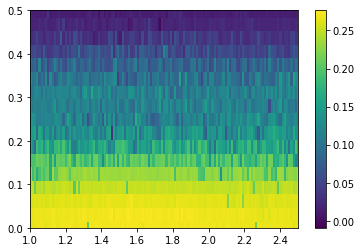

In [68]:
plt.pcolor(ZZ, VV, fh0(ZZ, 0, 0, VV, 0) + fdens)
plt.ylim((0.0,0.5))
plt.xlim((1.0,2.5))
plt.colorbar()

In [115]:
dv_bin

0.03125

(0.015625, 2)

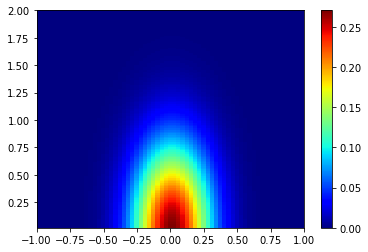

In [101]:
plt.pcolor(VVpar, VVperp, fh0(0,VVperp/np.sqrt(2),VVperp/np.sqrt(2),VVpar,0), cmap = 'jet')
plt.colorbar()
plt.xlim((-1,1))
plt.ylim((dv_bin_perp,2))

In [106]:
VVperp

array([[0.0078125, 0.0078125, 0.0078125, ..., 0.0078125, 0.0078125,
        0.0078125],
       [0.0234375, 0.0234375, 0.0234375, ..., 0.0234375, 0.0234375,
        0.0234375],
       [0.0390625, 0.0390625, 0.0390625, ..., 0.0390625, 0.0390625,
        0.0390625],
       ...,
       [3.9609375, 3.9609375, 3.9609375, ..., 3.9609375, 3.9609375,
        3.9609375],
       [3.9765625, 3.9765625, 3.9765625, ..., 3.9765625, 3.9765625,
        3.9765625],
       [3.9921875, 3.9921875, 3.9921875, ..., 3.9921875, 3.9921875,
        3.9921875]])

In [ ]:
fdensv.min()